# **Entregable 1 - Introducción a la Inteligencia Artificial**

Estudiante:
- Ana María Uribe Betancur - CC 1000537653


# 1. Exploración de datos

La exploración inicia con la importación de las librerías a usar y la carga del archivo *train.csv* desde el entorno local de Colab.

In [1]:
# Importación de las librerías necesarias

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("train.csv")
df_train

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,...,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,...,N,Si,Si,No,Primaria completa,bajo,0.132,0.426,0.261,0.328


Se visualiza la forma de la base de datos.

In [3]:
print(f"Forma del dataset (filas, columnas): {df_train.shape}")

Forma del dataset (filas, columnas): (692500, 21)


Se visualizan todas las variables que contiene la base de datos.

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           692500 non-null  int64  
 1   PERIODO_ACADEMICO            692500 non-null  int64  
 2   E_PRGM_ACADEMICO             692500 non-null  object 
 3   E_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   E_HORASSEMANATRABAJA         661643 non-null  object 
 6   F_ESTRATOVIVIENDA            660363 non-null  object 
 7   F_TIENEINTERNET              665871 non-null  object 
 8   F_EDUCACIONPADRE             669322 non-null  object 
 9   F_TIENELAVADORA              652727 non-null  object 
 10  F_TIENEAUTOMOVIL             648877 non-null  object 
 11  E_PRIVADO_LIBERTAD           692500 non-null  object 
 12  E_PAGOMATRICULAPROPIO        686002 non-null  object 
 13 

Se visualizan los valores nulos y duplicados por columna.

In [5]:
print("Valores nulos por variable:")
df_train.isnull().sum()

Valores nulos por variable:


,0
ID,0
PERIODO_ACADEMICO,0
E_PRGM_ACADEMICO,0
E_PRGM_DEPARTAMENTO,0
E_VALORMATRICULAUNIVERSIDAD,6287
E_HORASSEMANATRABAJA,30857
F_ESTRATOVIVIENDA,32137
F_TIENEINTERNET,26629
F_EDUCACIONPADRE,23178
F_TIENELAVADORA,39773


In [6]:
print(f"Datos duplicados por variable: {df_train.duplicated().sum()}")

Datos duplicados por variable: 0


# 2. Resumen estadístico

## Comportamiento de variables cuantitativas

En la siguiente tabla se observan valores como datos totales, media, desviación estándar y cuartiles (valor mínimo, 25%, 50%, 75%, valor máximo) para las variables cuantitativas. Puede notarse que, si bien el período académico es de tipo numérico, representa un año y un intervalo dentro del mismo año, por lo que no es coherente analizar su comportamiento junto con los demás indicadores.

In [7]:
df_train[[i for i in df_train.columns if i not in ["ID", "PERIODO_ACADEMICO"]]].describe()

,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
count,692500.000000,692500.000000,692500.000000,692500.000000
mean,0.268629,0.259996,0.262087,0.262903
std,0.122130,0.093480,0.058862,0.067944
min,0.000000,0.000000,0.000000,0.000000
25%,0.203000,0.212000,0.254000,0.255000
50%,0.240000,0.271000,0.276000,0.285000
75%,0.314000,0.309000,0.293000,0.303000
max,0.657000,0.487000,0.320000,0.332000


Se tiene también el comportamiento aislado de la media, mediana y moda para las mismas variables.

In [8]:
# Variables a analizar
variables = ["INDICADOR_1", "INDICADOR_2", "INDICADOR_3", "INDICADOR_4"]

print("       Estadísticos descriptivos de indicadores\n" + "="*55)

for variable in variables:
    media = df_train[variable].mean()
    moda = df_train[variable].mode().values[0]
    mediana = df_train[variable].median()

    print(f"\n - {variable}")
    print("-"*55)
    print(f"   Media:    {media:,.3f}")
    print(f"   Mediana:  {mediana:,.3f}")
    print(f"   Moda:     {moda:,.3f}")
    print("-"*55)

       Estadísticos descriptivos de indicadores

 - INDICADOR_1
-------------------------------------------------------
   Media:    0.269
   Mediana:  0.240
   Moda:     0.213
-------------------------------------------------------

 - INDICADOR_2
-------------------------------------------------------
   Media:    0.260
   Mediana:  0.271
   Moda:     0.277
-------------------------------------------------------

 - INDICADOR_3
-------------------------------------------------------
   Media:    0.262
   Mediana:  0.276
   Moda:     0.276
-------------------------------------------------------

 - INDICADOR_4
-------------------------------------------------------
   Media:    0.263
   Mediana:  0.285
   Moda:     0.296
-------------------------------------------------------


## Valores únicos por variable

In [9]:
for col in df_train.columns:
    print(f'{col} = {df_train[col].nunique()} valores') # Determinar la cantidad de opciones de respuesta por variable

ID = 692500 valores
PERIODO_ACADEMICO = 9 valores
E_PRGM_ACADEMICO = 948 valores
E_PRGM_DEPARTAMENTO = 31 valores
E_VALORMATRICULAUNIVERSIDAD = 8 valores
E_HORASSEMANATRABAJA = 5 valores
F_ESTRATOVIVIENDA = 7 valores
F_TIENEINTERNET = 2 valores
F_EDUCACIONPADRE = 12 valores
F_TIENELAVADORA = 2 valores
F_TIENEAUTOMOVIL = 2 valores
E_PRIVADO_LIBERTAD = 2 valores
E_PAGOMATRICULAPROPIO = 2 valores
F_TIENECOMPUTADOR = 2 valores
F_TIENEINTERNET.1 = 2 valores
F_EDUCACIONMADRE = 12 valores
RENDIMIENTO_GLOBAL = 4 valores
INDICADOR_1 = 375 valores
INDICADOR_2 = 342 valores
INDICADOR_3 = 196 valores
INDICADOR_4 = 276 valores


# 3. Visualización de datos

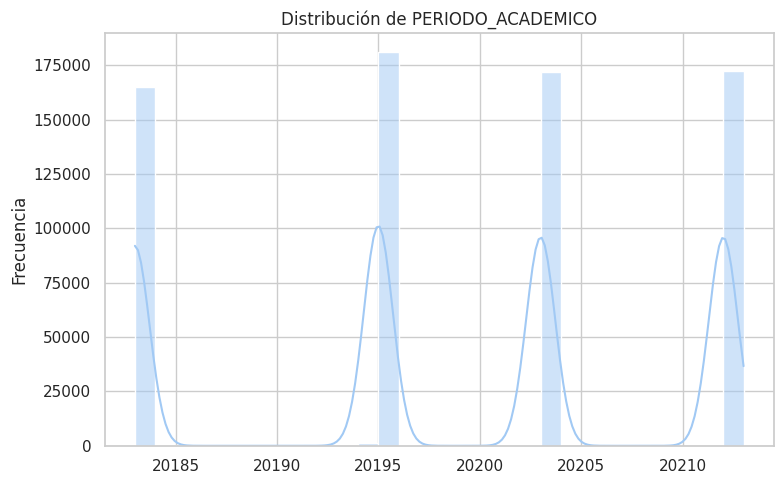

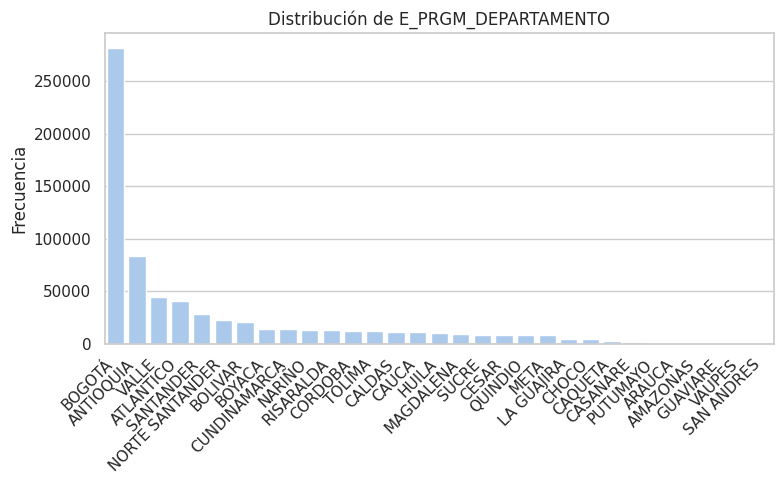

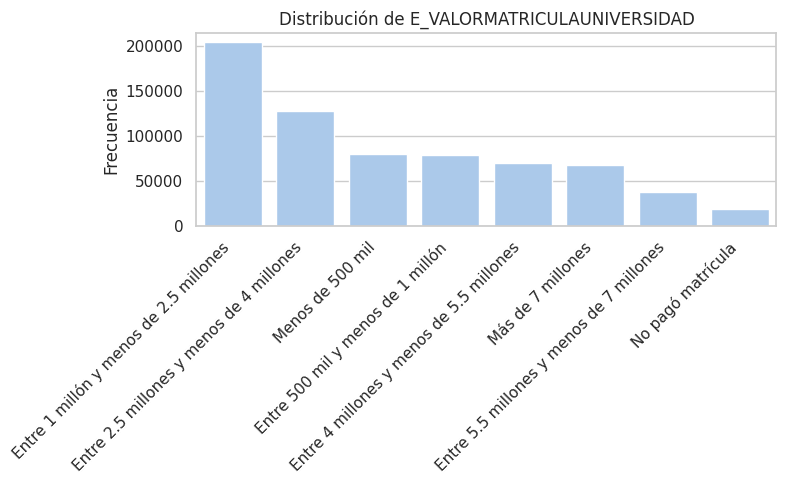

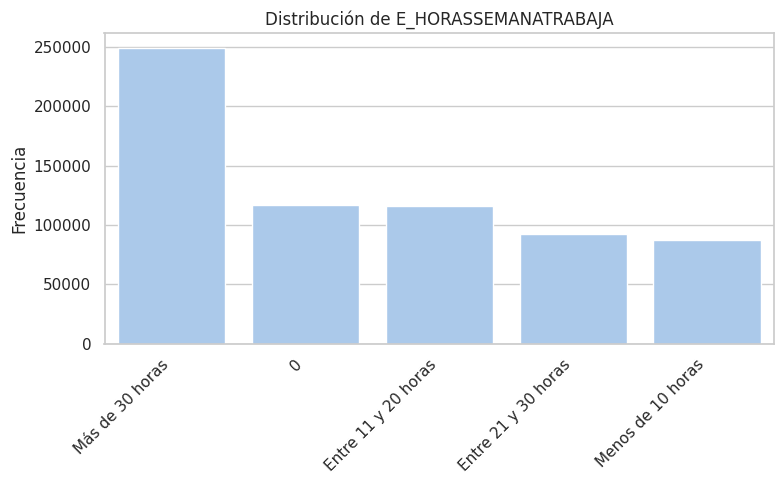

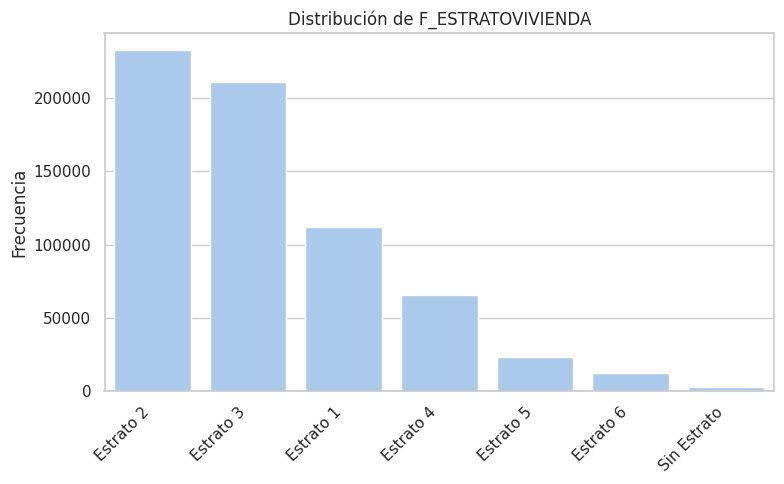

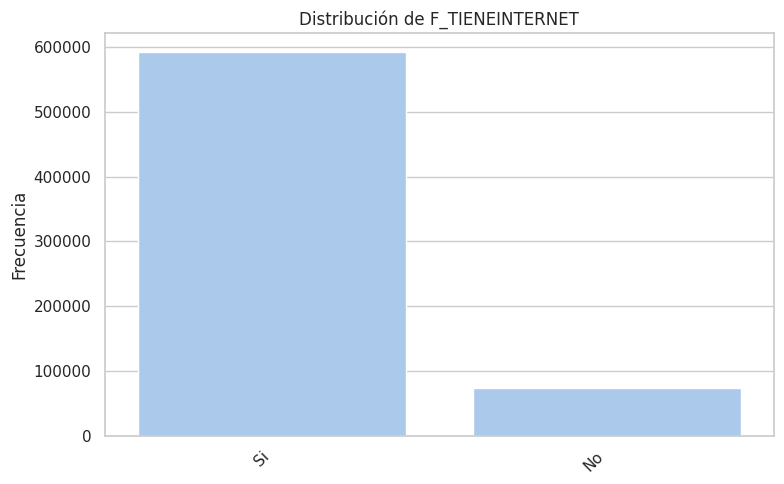

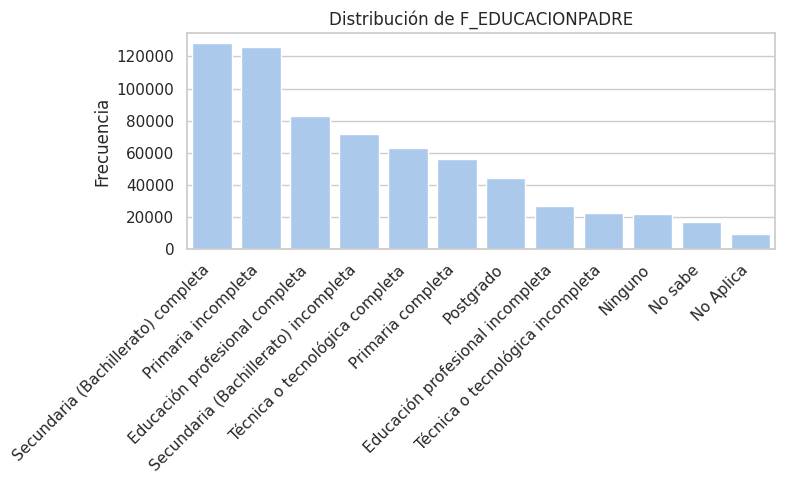

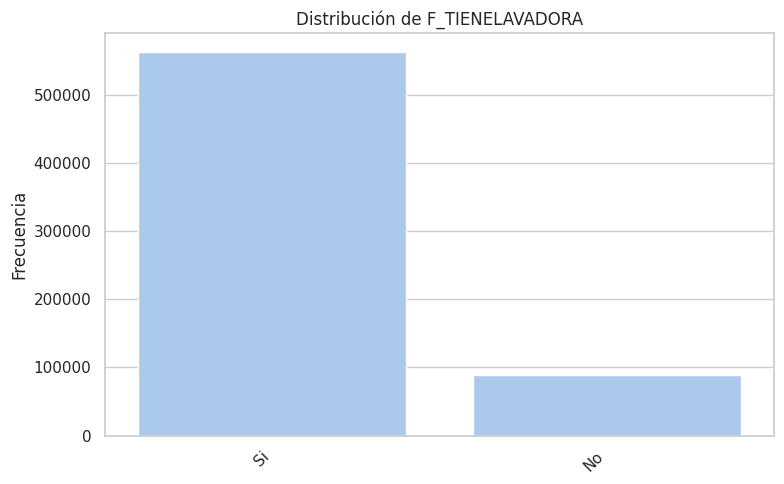

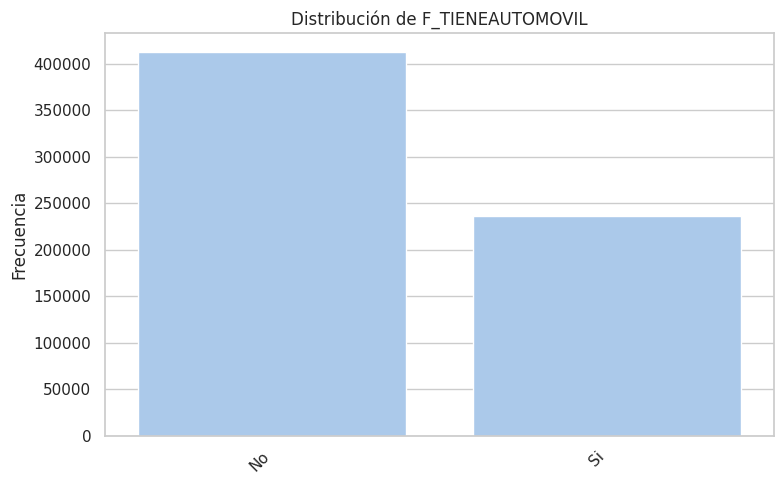

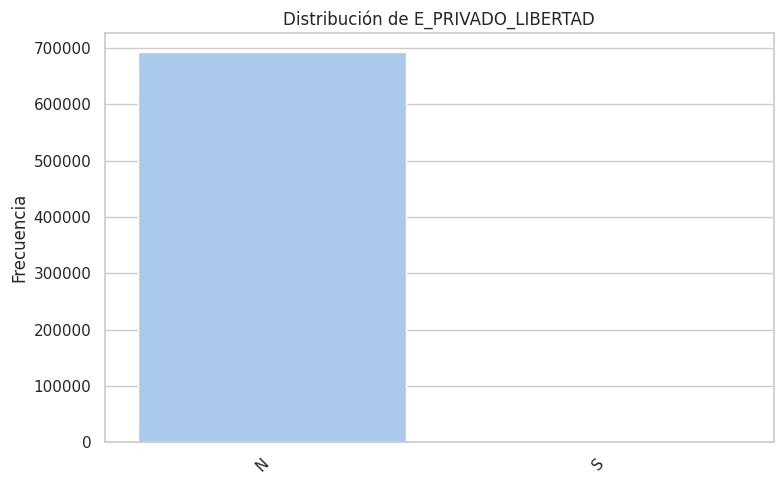

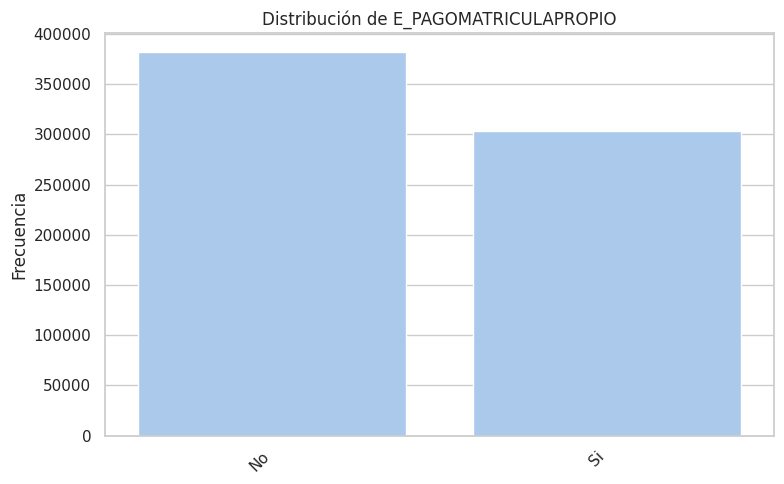

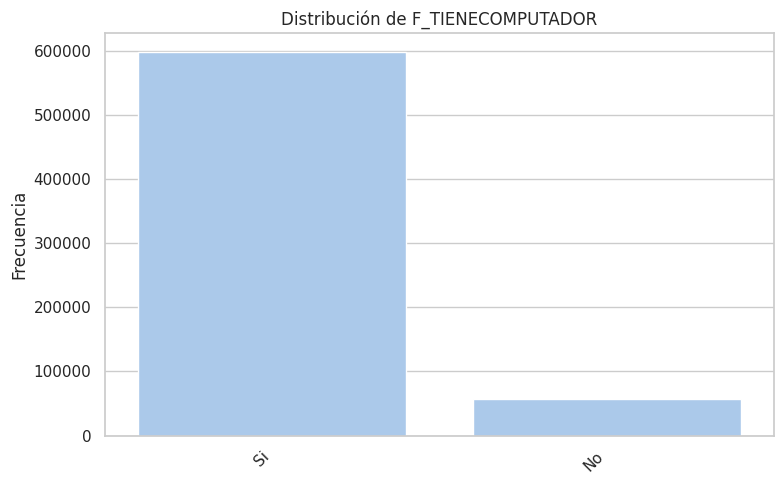

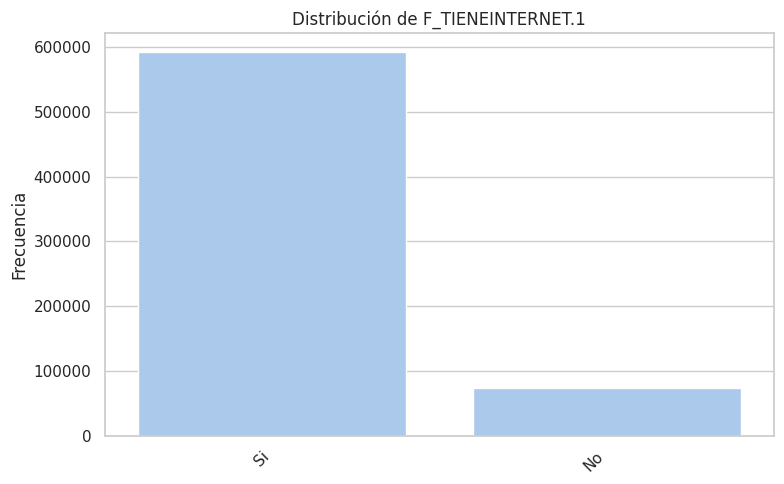

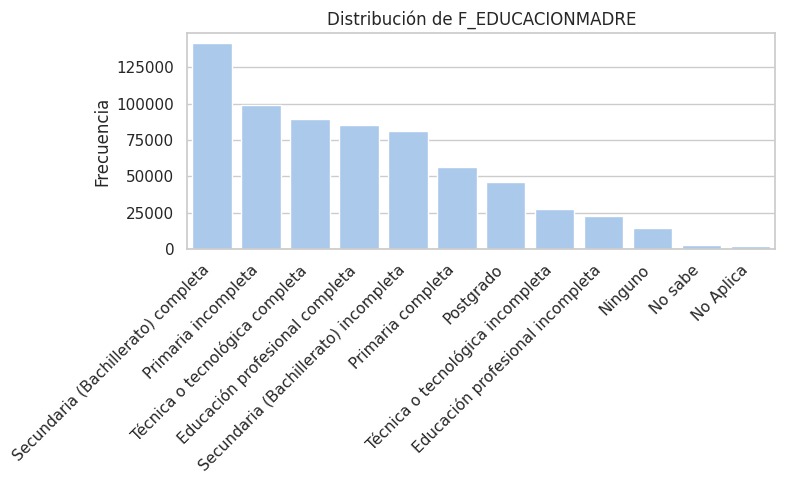

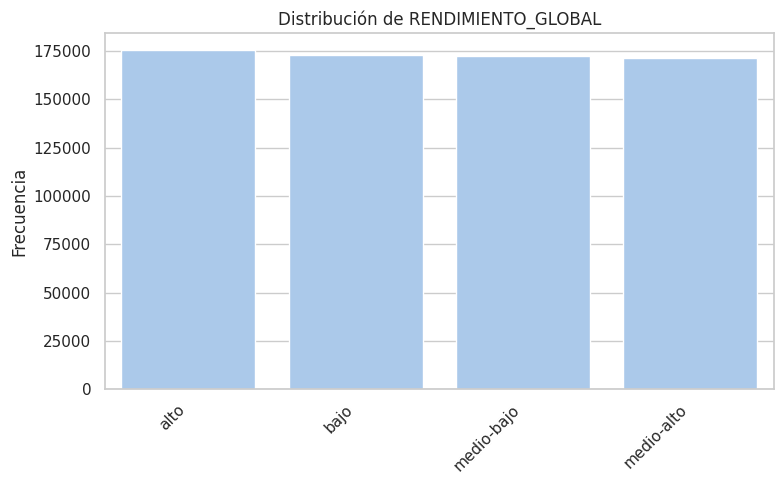

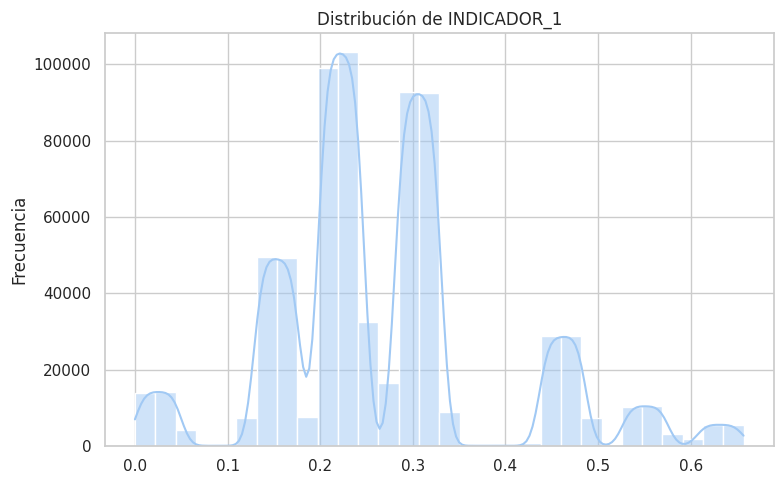

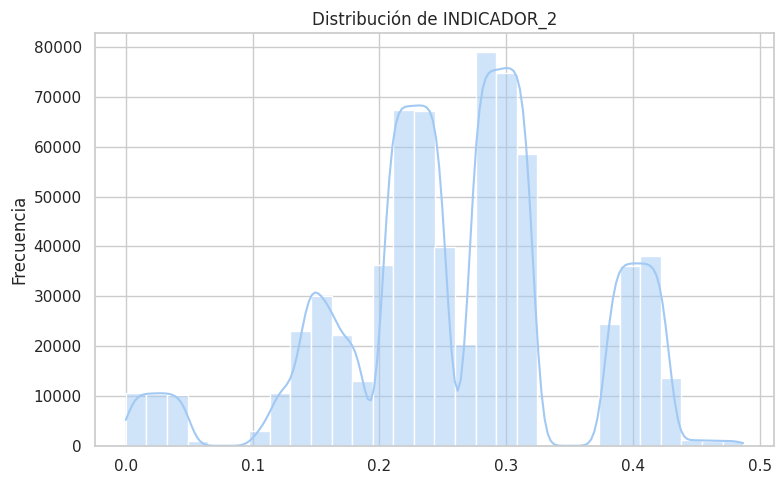

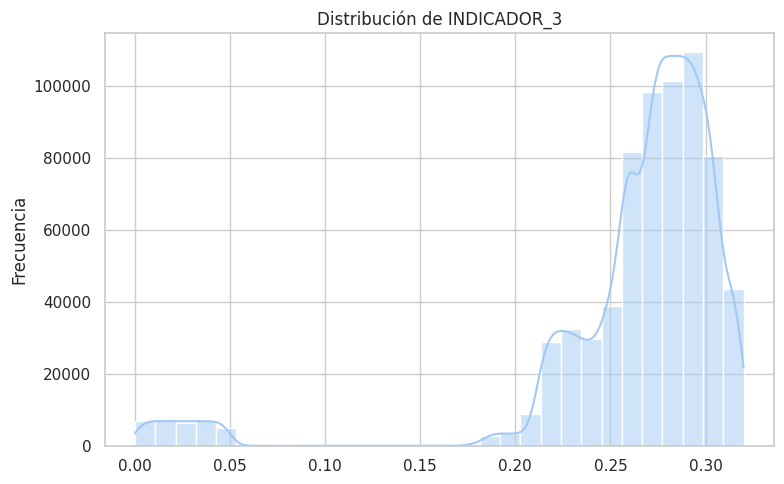

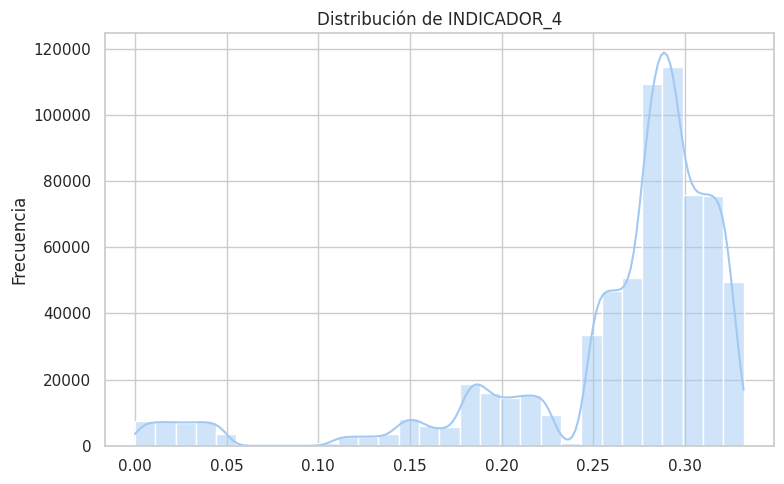

In [13]:
# Ajustes de estilo
sns.set_theme(style="whitegrid", palette="pastel")

# Excluir columnas no deseadas
cols = [c for c in df_train.columns if c not in ["ID", "E_PRGM_ACADEMICO"]]

# Iterar sobre columnas seleccionadas
for col in cols:
    plt.figure(figsize=(8,5))

    # Numéricas: histograma
    if df_train[col].dtype in ["int64", "float64"]:
        sns.histplot(df_train[col].dropna(), kde=True, bins=30)
        plt.xlabel("")
        plt.ylabel("Frecuencia")
        plt.title(f"Distribución de {col}")

    # Categóricas: conteo
    else:
        sns.countplot(x=col, data=df_train, order=df_train[col].value_counts().index)
        plt.xticks(rotation=45, ha="right")
        plt.xlabel("")
        plt.ylabel("Frecuencia")
        plt.title(f"Distribución de {col}")

    plt.tight_layout()
    plt.show()


Como la variable que representa el programa academico tiene 948 valores únicos, observar su distribución completa resulta visualmente ineficiente. Por practicidad, se observa la distribución de los 15 programas académicos más frecuentes.

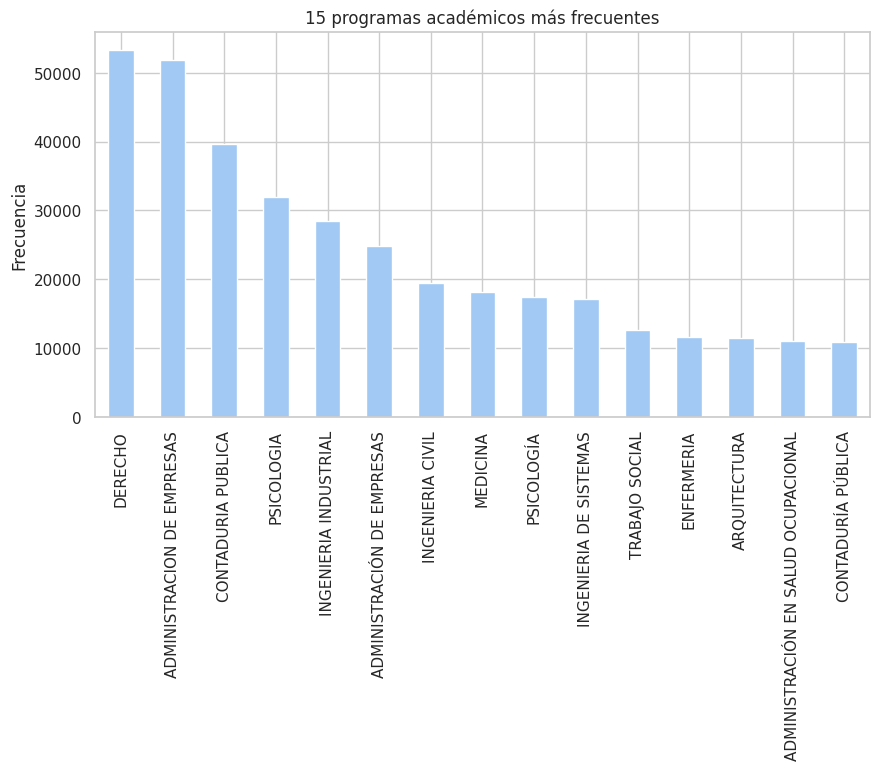

In [24]:
top_n = 15
df_train["E_PRGM_ACADEMICO"].value_counts().head(top_n).plot(kind="bar", figsize=(10,5))
plt.title(f"{top_n} programas académicos más frecuentes")
plt.ylabel("Frecuencia")
plt.xlabel("")
plt.show()

# 4. Análisis de correlación

Se visualizan correlaciones entre variables numéricas, y categóricas-numéricas.

In [17]:
copy = df_train.drop(columns=["ID"]).copy()

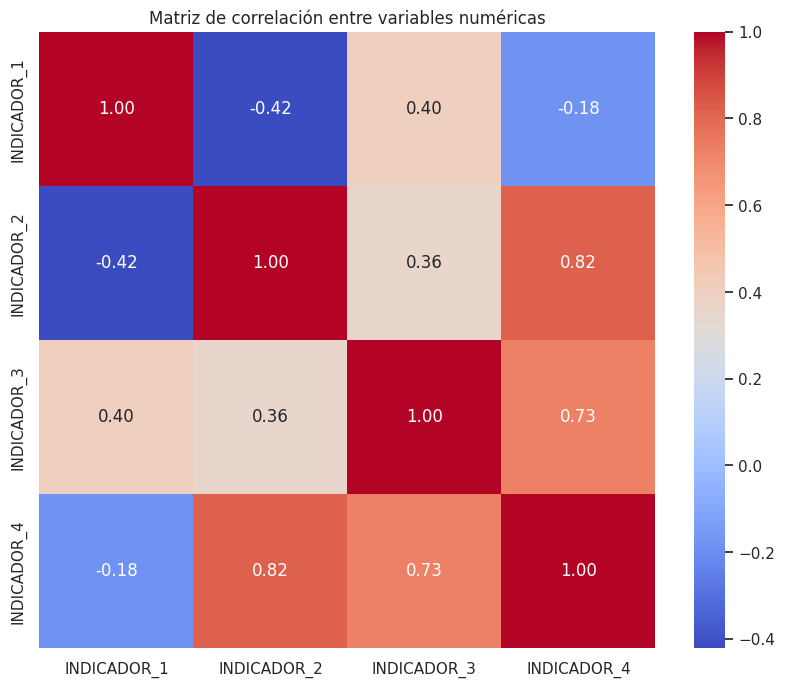

In [21]:
# Relacón entre indicadores
num_cols = copy.select_dtypes(include=["int64", "float64"]).columns
num_cols = num_cols.drop("PERIODO_ACADEMICO", errors="ignore")

# Calcular y visualizar correlación
corr = copy[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

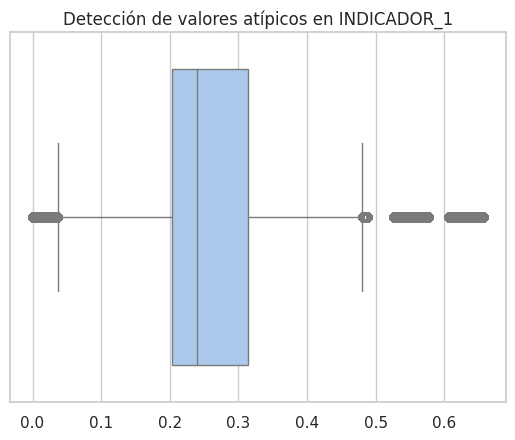

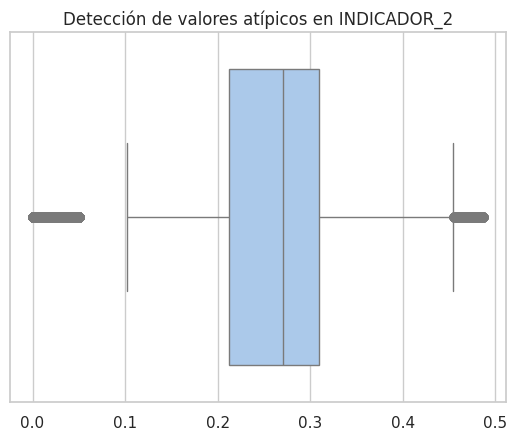

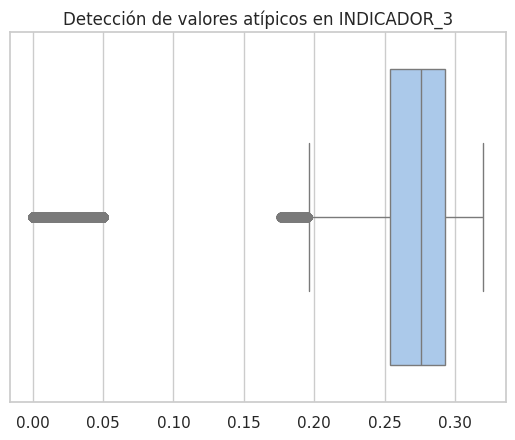

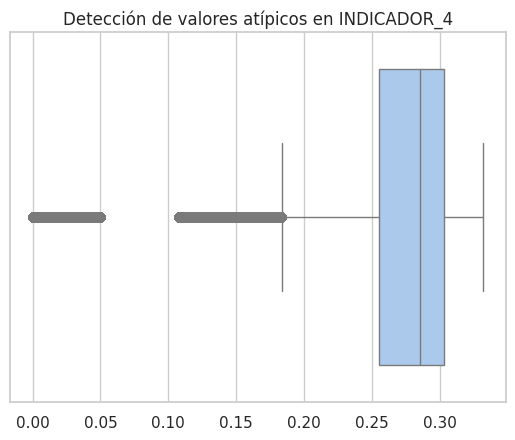

In [25]:
# Valores atípicos en indicadores
for col in num_cols:
    sns.boxplot(x=df_train[col])
    plt.title(f"Detección de valores atípicos en {col}")
    plt.xlabel("")
    plt.show()

Se observa la distribución del rendimiento global según indicadores.

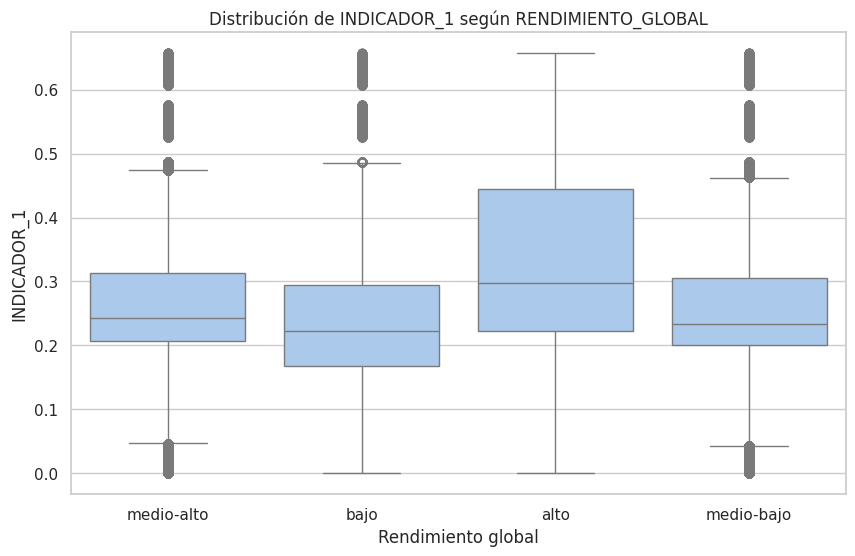

In [41]:
cat_var = "RENDIMIENTO_GLOBAL"         # variable categórica
num_var = "INDICADOR_1"  # variable numérica

if cat_var in copy.columns and num_var in copy.columns:
    sns.boxplot(x=cat_var, y=num_var, data=copy)
    plt.title(f"Distribución de {num_var} según {cat_var}")
    plt.xlabel("Rendimiento global")
    plt.ylabel(num_var)
    plt.show()

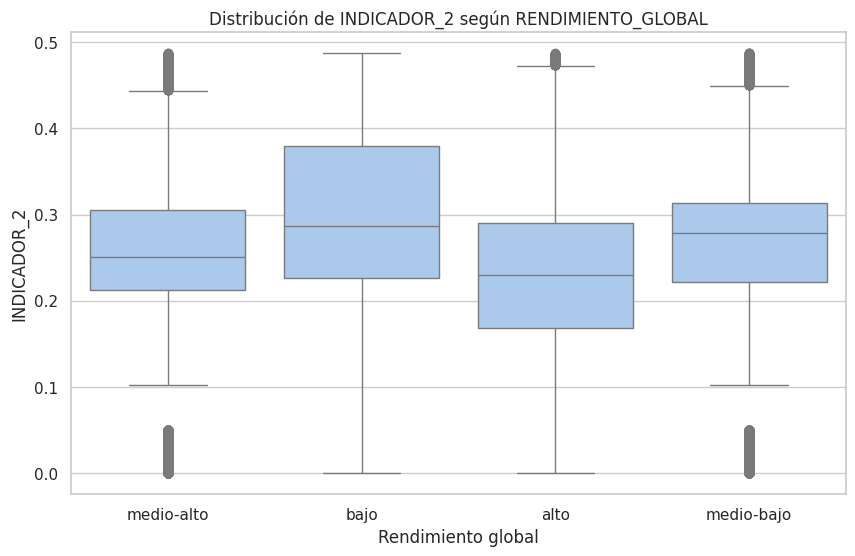

In [42]:
cat_var = "RENDIMIENTO_GLOBAL"         # variable categórica
num_var = "INDICADOR_2"  # variable numérica

if cat_var in copy.columns and num_var in copy.columns:
    sns.boxplot(x=cat_var, y=num_var, data=copy)
    plt.title(f"Distribución de {num_var} según {cat_var}")
    plt.xlabel("Rendimiento global")
    plt.ylabel(num_var)
    plt.show()

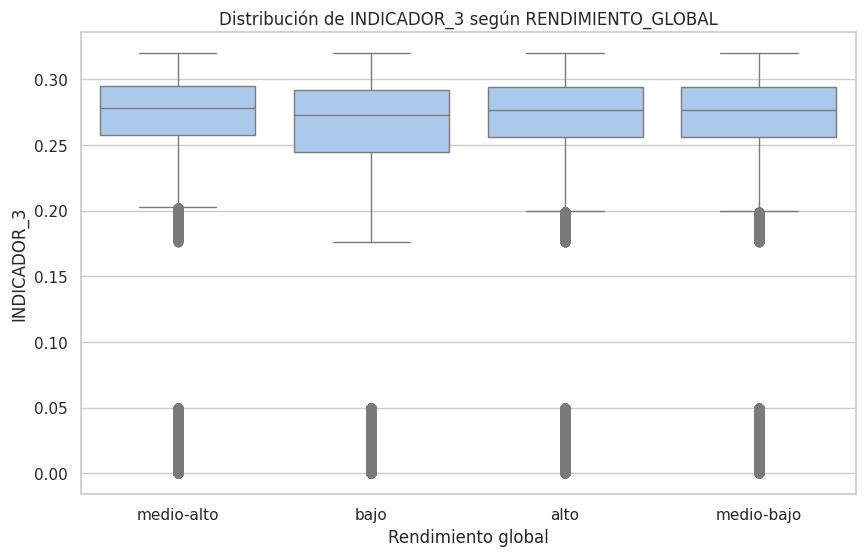

In [43]:
cat_var = "RENDIMIENTO_GLOBAL"         # variable categórica
num_var = "INDICADOR_3"  # variable numérica

if cat_var in copy.columns and num_var in copy.columns:
    sns.boxplot(x=cat_var, y=num_var, data=copy)
    plt.title(f"Distribución de {num_var} según {cat_var}")
    plt.xlabel("Rendimiento global")
    plt.ylabel(num_var)
    plt.show()

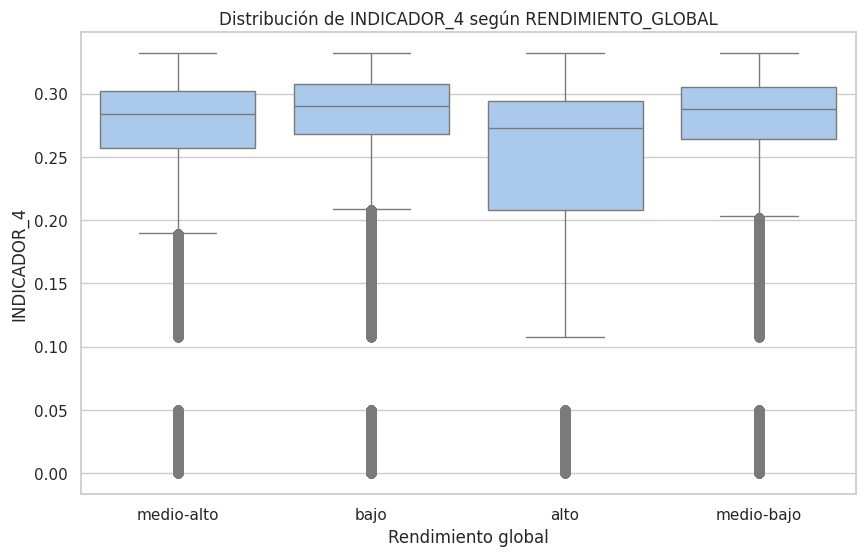

In [46]:
cat_var = "RENDIMIENTO_GLOBAL"         # variable categórica
num_var = "INDICADOR_4"  # variable numérica

if cat_var in copy.columns and num_var in copy.columns:
    sns.boxplot(x=cat_var, y=num_var, data=copy)
    plt.title(f"Distribución de {num_var} según {cat_var}")
    plt.xlabel("Rendimiento global")
    plt.ylabel(num_var)
    plt.show()